#Tugas Praktikum Mandiri 6
 Gunakan SVM untuk klasifikasi dataset.

In [12]:
#Menghubungkan dengan Dataset
from google.colab import drive
drive.mount ('/content/gdrive')
path = "/content/gdrive/MyDrive/Praktikum_ML/Latihan6"

Mounted at /content/gdrive


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(path +'/data/mushrooms.csv',sep=',')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [25]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [26]:
df["class"].unique()

array(['p', 'e'], dtype=object)

In [27]:
df["class"].value_counts()

,count
class,
e,4208
p,3916


In [28]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [29]:
important_columns = ['odor', 'gill-size', 'gill-color', 'spore-print-color', 'stalk-surface-above-ring']
X = df[important_columns]
y = df['class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
y_pred =  model.predict(X_test)

print (f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 88.37%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       843
           1       0.84      0.94      0.89       782

    accuracy                           0.88      1625
   macro avg       0.89      0.89      0.88      1625
weighted avg       0.89      0.88      0.88      1625




Confusion Matrix:
[[702 141]
 [ 48 734]]


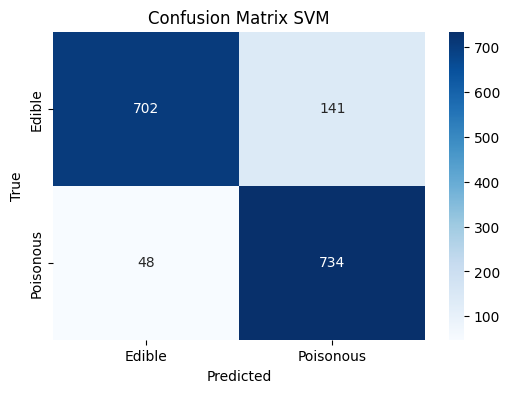

In [35]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix SVM')
plt.show()

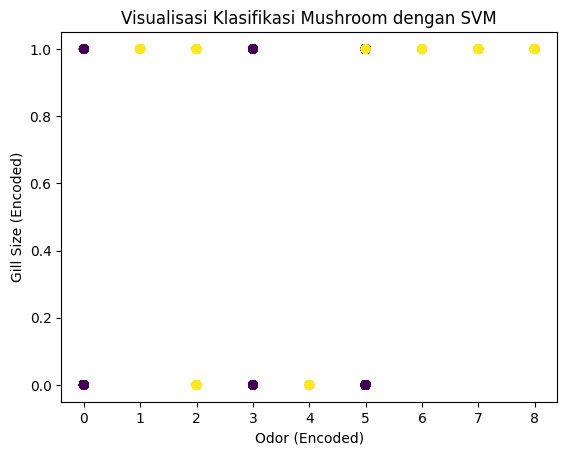

In [38]:
import matplotlib.pyplot as plt

plt.scatter(X['odor'], X['gill-size'], c=y.astype('category').cat.codes)
plt.xlabel('Odor (Encoded)')
plt.ylabel('Gill Size (Encoded)')
plt.title('Visualisasi Klasifikasi Mushroom dengan SVM')
plt.show()